In [2]:
from src.config import load_features, load_balanced_data, load_validation_data, load_train_data, load_validation_benchmarck, load_validation_examples, load_predicciones
import metric_visualization as metric
import pandas as pd
import matplotlib.pyplot as plt
import time
from numerai_tools.scoring import numerai_corr, correlation_contribution

In [3]:
val_benchmark = load_validation_benchmarck()

val_examples =load_validation_examples()

pred_modelos = load_predicciones("Prediccions_modelos_propios.parquet")



# df =  pd.read_parquet(
#     f"v4.3/meta_model.parquet"
# )





In [4]:
pred_modelos

,Target,XGBoost_1,XGBoost_2,XGBoost_3,XGBoost_4,XGBoost_5,XGBoost_6,XGBoost_7,XGBoost_8,XGBoost_9,...,LGBM_10,LGBM_11,LGBM_12,LGBM_13,LGBM_14,LGBM_15,regresion_lineal,TFT,era,Sistema_experto
id,,,,,,,,,,,,,,,,,,,,,
n002a15bc5575bbb,0.25,0.510103,0.532446,0.501001,0.486652,0.478404,0.493928,0.499814,0.489295,0.483122,...,0.502858,0.509349,0.501385,0.499348,0.505970,0.502269,0.532755,0.508563,0579,0.503319
n00309caaa0f955e,0.50,0.525307,0.520360,0.577385,0.655233,0.636425,0.524920,0.551889,0.530820,0.569990,...,0.513797,0.512697,0.514011,0.513598,0.517053,0.516139,0.493619,0.485191,0579,0.512790
n00576b397182463,0.50,0.504555,0.482606,0.492719,0.447313,0.453398,0.411402,0.405185,0.460015,0.465703,...,0.493473,0.489196,0.496463,0.488675,0.482472,0.479491,0.459086,0.524290,0579,0.491252
n00633405d59c6a1,1.00,0.404202,0.398425,0.427741,0.411096,0.413201,0.535109,0.535876,0.504188,0.530306,...,0.498406,0.492512,0.520875,0.512925,0.519088,0.511977,0.494617,0.538148,0579,0.500869
n008c2eefc8911c7,0.50,0.487141,0.476132,0.526758,0.531174,0.524823,0.511057,0.519621,0.457744,0.531652,...,0.497211,0.496493,0.491583,0.493321,0.491379,0.494495,0.482673,0.504640,0579,0.495590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffdd81f2c65d2ab,0.50,0.470956,0.472184,0.442254,0.454872,0.468810,0.376242,0.308246,0.322285,0.323243,...,0.502254,0.507265,0.503479,0.502766,0.507069,0.504705,0.439644,0.482107,1123,0.502912
nffe6815fd6283de,0.75,0.505433,0.512428,0.558890,0.553735,0.484325,0.481970,0.500287,0.522280,0.568727,...,0.503630,0.498725,0.501832,0.505376,0.503642,0.501105,0.509569,0.492035,1123,0.502242
nffe8fad311dcb44,0.50,0.514638,0.530111,0.527859,0.539715,0.574924,0.494354,0.512142,0.495749,0.473570,...,0.500229,0.505901,0.508976,0.501209,0.501395,0.498475,0.543997,0.505139,1123,0.502008


In [6]:
pred_modelos = pred_modelos.reset_index()

val_benchmark = val_benchmark.reset_index()

# df = df.reset_index()

In [7]:
pred_modelos.columns

Index(['index', 'id', 'Target', 'XGBoost_1', 'XGBoost_2', 'XGBoost_3',
       'XGBoost_4', 'XGBoost_5', 'XGBoost_6', 'XGBoost_7', 'XGBoost_8',
       'XGBoost_9', 'XGBoost_10', 'Random_forest_11', 'Random_forest_21',
       'Random_forest_31', 'Random_forest_41', 'Random_forest_51',
       'Random_forest_61', 'Random_forest_71', 'Random_forest_81',
       'Random_forest_91', 'Random_forest_101', 'LGBM_1', 'LGBM_2', 'LGBM_3',
       'LGBM_4', 'LGBM_5', 'LGBM_6', 'LGBM_7', 'LGBM_8', 'LGBM_9', 'LGBM_10',
       'LGBM_11', 'LGBM_12', 'LGBM_13', 'LGBM_14', 'LGBM_15',
       'regresion_lineal', 'TFT', 'era', 'Sistema_experto'],
      dtype='object')

In [8]:
pred_modelos = pred_modelos.merge(val_benchmark, on="id"
)#.merge(df[["id","numerai_meta_model" ]])

In [9]:
# pred_lightgbm = pred_lightgbm.dropna()
pred_modelos

,index_x,id,Target,XGBoost_1,XGBoost_2,XGBoost_3,XGBoost_4,XGBoost_5,XGBoost_6,XGBoost_7,...,v4_lgbm_jerome20,v3_example_preds,v2_example_preds,v41_example_preds,v42_rain_ensemble,v42_rain_ensemble2,v42_teager_plus_cyrus,v42_teager_ensemble,v42_lgbm_ct_blend,v43_lgbm_ct_blend
0,0,n002a15bc5575bbb,0.25,0.510103,0.532446,0.501001,0.486652,0.478404,0.493928,0.499814,...,0.495979,0.346463,0.516395,0.499691,0.698907,0.633945,0.575170,0.656424,0.575170,0.709631
1,1,n00309caaa0f955e,0.50,0.525307,0.520360,0.577385,0.655233,0.636425,0.524920,0.551889,...,0.964735,0.968447,0.945350,0.946999,0.981852,0.961642,0.960198,0.978140,0.960198,0.967004
2,2,n00576b397182463,0.50,0.504555,0.482606,0.492719,0.447313,0.453398,0.411402,0.405185,...,0.268303,0.596412,0.406269,0.190142,0.097958,0.079192,0.112807,0.097958,0.112807,0.037740
3,3,n00633405d59c6a1,1.00,0.404202,0.398425,0.427741,0.411096,0.413201,0.535109,0.535876,...,0.424417,0.486698,0.890699,0.087441,0.357393,0.652712,0.504021,0.518045,0.504021,0.668179
4,4,n008c2eefc8911c7,0.50,0.487141,0.476132,0.526758,0.531174,0.524823,0.511057,0.519621,...,0.142916,0.577232,0.223551,0.251186,0.355331,0.218808,0.288926,0.247680,0.288926,0.206847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696200,696200,nffdd81f2c65d2ab,0.50,0.470956,0.472184,0.442254,0.454872,0.468810,0.376242,0.308246,...,0.406282,0.707322,0.490924,0.641240,0.425658,0.199062,0.400163,0.554354,0.400163,0.416888
696201,696201,nffe6815fd6283de,0.75,0.505433,0.512428,0.558890,0.553735,0.484325,0.481970,0.500287,...,0.516215,0.400775,0.186620,0.399755,0.091577,0.187232,0.075464,0.075056,0.075464,0.109525
696202,696202,nffe8fad311dcb44,0.50,0.514638,0.530111,0.527859,0.539715,0.574924,0.494354,0.512142,...,0.542933,0.460126,0.480318,0.617785,0.557210,0.540689,0.651438,0.653477,0.651438,0.543953
696203,696203,nfffd063e258e218,0.50,0.515684,0.566192,0.672479,0.680744,0.761446,0.779366,0.871699,...,0.885784,0.961248,0.961860,0.969203,0.904344,0.863145,0.863145,0.837650,0.863145,0.909851


In [9]:
pred_modelos.columns

Index(['id', 'Target', 'XGBoost_1', 'XGBoost_2', 'XGBoost_3', 'XGBoost_4',
       'XGBoost_5', 'XGBoost_6', 'XGBoost_7', 'XGBoost_8', 'XGBoost_9',
       'XGBoost_10', 'Random_forest_11', 'Random_forest_21',
       'Random_forest_31', 'Random_forest_41', 'Random_forest_51',
       'Random_forest_61', 'Random_forest_71', 'Random_forest_81',
       'Random_forest_91', 'Random_forest_101', 'LGBM_1', 'LGBM_2', 'LGBM_3',
       'LGBM_4', 'LGBM_5', 'LGBM_6', 'LGBM_7', 'LGBM_8', 'LGBM_9', 'LGBM_10',
       'LGBM_11', 'LGBM_12', 'LGBM_13', 'LGBM_14', 'LGBM_15',
       'regresion_lineal', 'TFT', 'era_x', 'Sistema_experto', 'era_y',
       'v43_lgbm_teager60', 'v43_lgbm_teager20', 'v43_lgbm_cyrus60',
       'v43_lgbm_cyrus20', 'v42_example_preds', 'v42_lgbm_teager60',
       'v42_lgbm_teager20', 'v42_lgbm_agnes20', 'v42_lgbm_claudia20',
       'v42_lgbm_rowan20', 'v41_lgbm_xerxes60', 'v41_lgbm_xerxes20',
       'v41_lgbm_sam60', 'v41_lgbm_sam20', 'v41_lgbm_cyrus60',
       'v41_lgbm_cyrus20', 'v

In [16]:
pred_modelos =pred_modelos[['id', 'Target', 
       'v43_lgbm_teager60', 'v43_lgbm_teager20', 'v43_lgbm_cyrus60',
       'v43_lgbm_cyrus20', 'v42_example_preds', 'v42_lgbm_teager60',
       'v42_lgbm_teager20', 'v42_lgbm_agnes20', 'v42_lgbm_claudia20',
       'v42_lgbm_rowan20', 'v41_lgbm_xerxes60', 'v41_lgbm_xerxes20',
       'v41_lgbm_sam60', 'v41_lgbm_sam20', 'v41_lgbm_cyrus60',
       'v41_lgbm_cyrus20', 'v41_lgbm_caroline60', 'v41_lgbm_caroline20',
       'v4_lgbm_waldo60', 'v4_lgbm_waldo20', 'v4_lgbm_victor60',
       'v4_lgbm_victor20', 'v4_lgbm_tyler60', 'v4_lgbm_tyler20',
       'v4_lgbm_ralph60', 'v4_lgbm_ralph20', 'v4_lgbm_nomi60',
       'v4_lgbm_nomi20', 'v4_lgbm_jerome60', 'v4_lgbm_jerome20',
       'v3_example_preds', 'v2_example_preds', 'v41_example_preds',
       'v42_rain_ensemble', 'v42_rain_ensemble2', 'v42_teager_plus_cyrus',
       'v42_teager_ensemble', 'v42_lgbm_ct_blend', 'v43_lgbm_ct_blend',
       'LGBM_9', 'LGBM_10',
       'LGBM_11',  'LGBM_13',
       'era_x', 'Sistema_experto']]

In [28]:
def calculo_eras(df, output_folder, nombre_modelo):

    import os


    df_eras = pd.DataFrame()

    for columna in df.columns:

        print(columna)
        
        if columna not in ["Target", "era_x", "id"]:
            per_era_corr = df.groupby("era_x").apply(
            lambda x: numerai_corr(x[[columna]].dropna(), x["Target"].dropna())
        )
            
            df_eras[columna] = per_era_corr.squeeze()

    #df_eras = df_eras.drop("Target", axis=1)
    
    color_dict = {
        'Sistema_experto': 'tab:blue',
        'LGBM': 'tab:red',
        'Otros': 'tab:green'
    }

    # Crear una figura más grande para la visualización
    plt.figure(figsize=(40, 10))

    # Lista para almacenar los handles y labels únicos para la leyenda
    handles_labels = {}

    for columna in df_eras.columns:
        # Determinar el grupo del modelo
        if 'Sistema_experto' in columna:
            group = 'Sistema_experto'
        elif 'LGBM' in columna:
            group = 'LGBM'
        else:
            group = 'Otros'
        
        color = color_dict[group]
    
        # Determinar el grosor de la línea
        if group in ['LGBM']:
            linewidth = 2.5  # Ajusta el grosor a tu preferencia

        elif group in ['Sistema_experto']:
            linewidth = 4

        else:
            linewidth = 0.5 # Grosor más delgado para 'Otros'
        
        # Graficar la línea con el color especificado y el grosor determinado
        line, = plt.plot(df_eras[columna].cumsum(), label=columna, color=color, linewidth=linewidth)
        
        # Solo añadir un handle y label por grupo a la leyenda
        if group not in handles_labels:
            handles_labels[group] = line

    # Crear la leyenda solo con los nombres de los grupos
    plt.legend(handles_labels.values(), handles_labels.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

    # Añadir título y etiquetas de los ejes
    plt.title("Comparacion modelos Propios vs Numerai")
    plt.xlabel("era")
    xticks = np.arange(0, len(df_eras), step=10)  # Ajusta el paso según tus datos
    plt.xticks(ticks=xticks, labels=[str(i) for i in xticks], rotation=90, fontsize=12)
    plt.ylabel("Cumulative Sum")

    # Ajustar el layout
    plt.subplots_adjust(right=0.75)

    # Guardar el gráfico como una imagen
    plt.savefig(os.path.join(output_folder, f"{nombre_modelo}.png"))
    plt.show()

    return df_eras

id
Target
v43_lgbm_teager60
v43_lgbm_teager20
v43_lgbm_cyrus60
v43_lgbm_cyrus20
v42_example_preds
v42_lgbm_teager60
v42_lgbm_teager20
v42_lgbm_agnes20
v42_lgbm_claudia20
v42_lgbm_rowan20
v41_lgbm_xerxes60
v41_lgbm_xerxes20
v41_lgbm_sam60
v41_lgbm_sam20
v41_lgbm_cyrus60
v41_lgbm_cyrus20
v41_lgbm_caroline60
v41_lgbm_caroline20
v4_lgbm_waldo60
v4_lgbm_waldo20
v4_lgbm_victor60
v4_lgbm_victor20
v4_lgbm_tyler60
v4_lgbm_tyler20
v4_lgbm_ralph60
v4_lgbm_ralph20
v4_lgbm_nomi60
v4_lgbm_nomi20
v4_lgbm_jerome60
v4_lgbm_jerome20
v3_example_preds
v2_example_preds
v41_example_preds
v42_rain_ensemble
v42_rain_ensemble2
v42_teager_plus_cyrus
v42_teager_ensemble
v42_lgbm_ct_blend
v43_lgbm_ct_blend
LGBM_9
LGBM_10
LGBM_11
LGBM_13
era_x
Sistema_experto


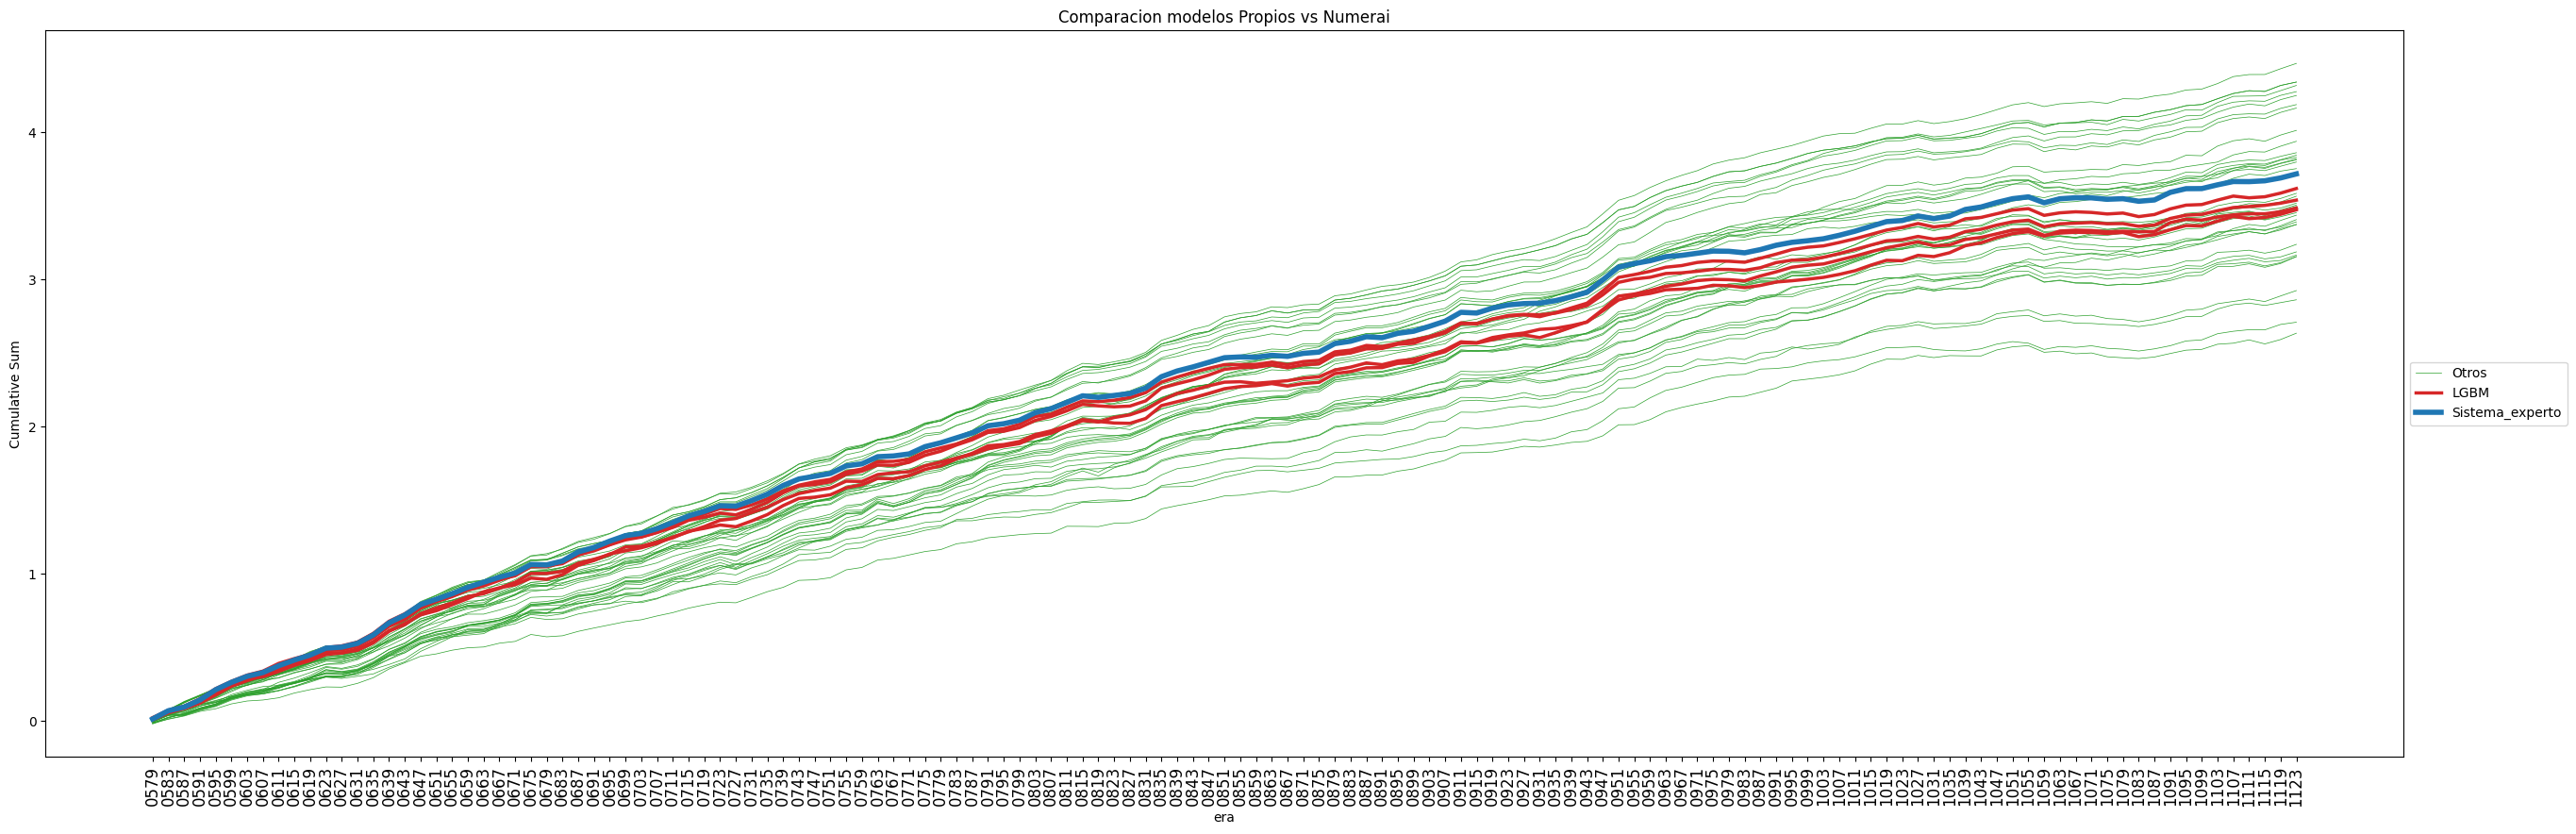

In [29]:
df_eras = calculo_eras(pred_modelos, "resultados_modelos", "Comparacion_modelos_propios_vs_numerai")

In [23]:
descripcion = df_eras.describe()

descripcion.to_excel("Datos_Modelos.xlsx")


suma_columnas = df_eras.sum()
suma_df = pd.DataFrame(suma_columnas).transpose()
suma_df.index = ['Suma']

result_df = pd.concat([descripcion, suma_df])


descripcion = result_df.T.sort_values("mean", ascending=False).reset_index().rename(columns = {"index":"Modelo"})


descripcion.to_excel("Datos_Modelos_propios_y_numerai.xlsx")

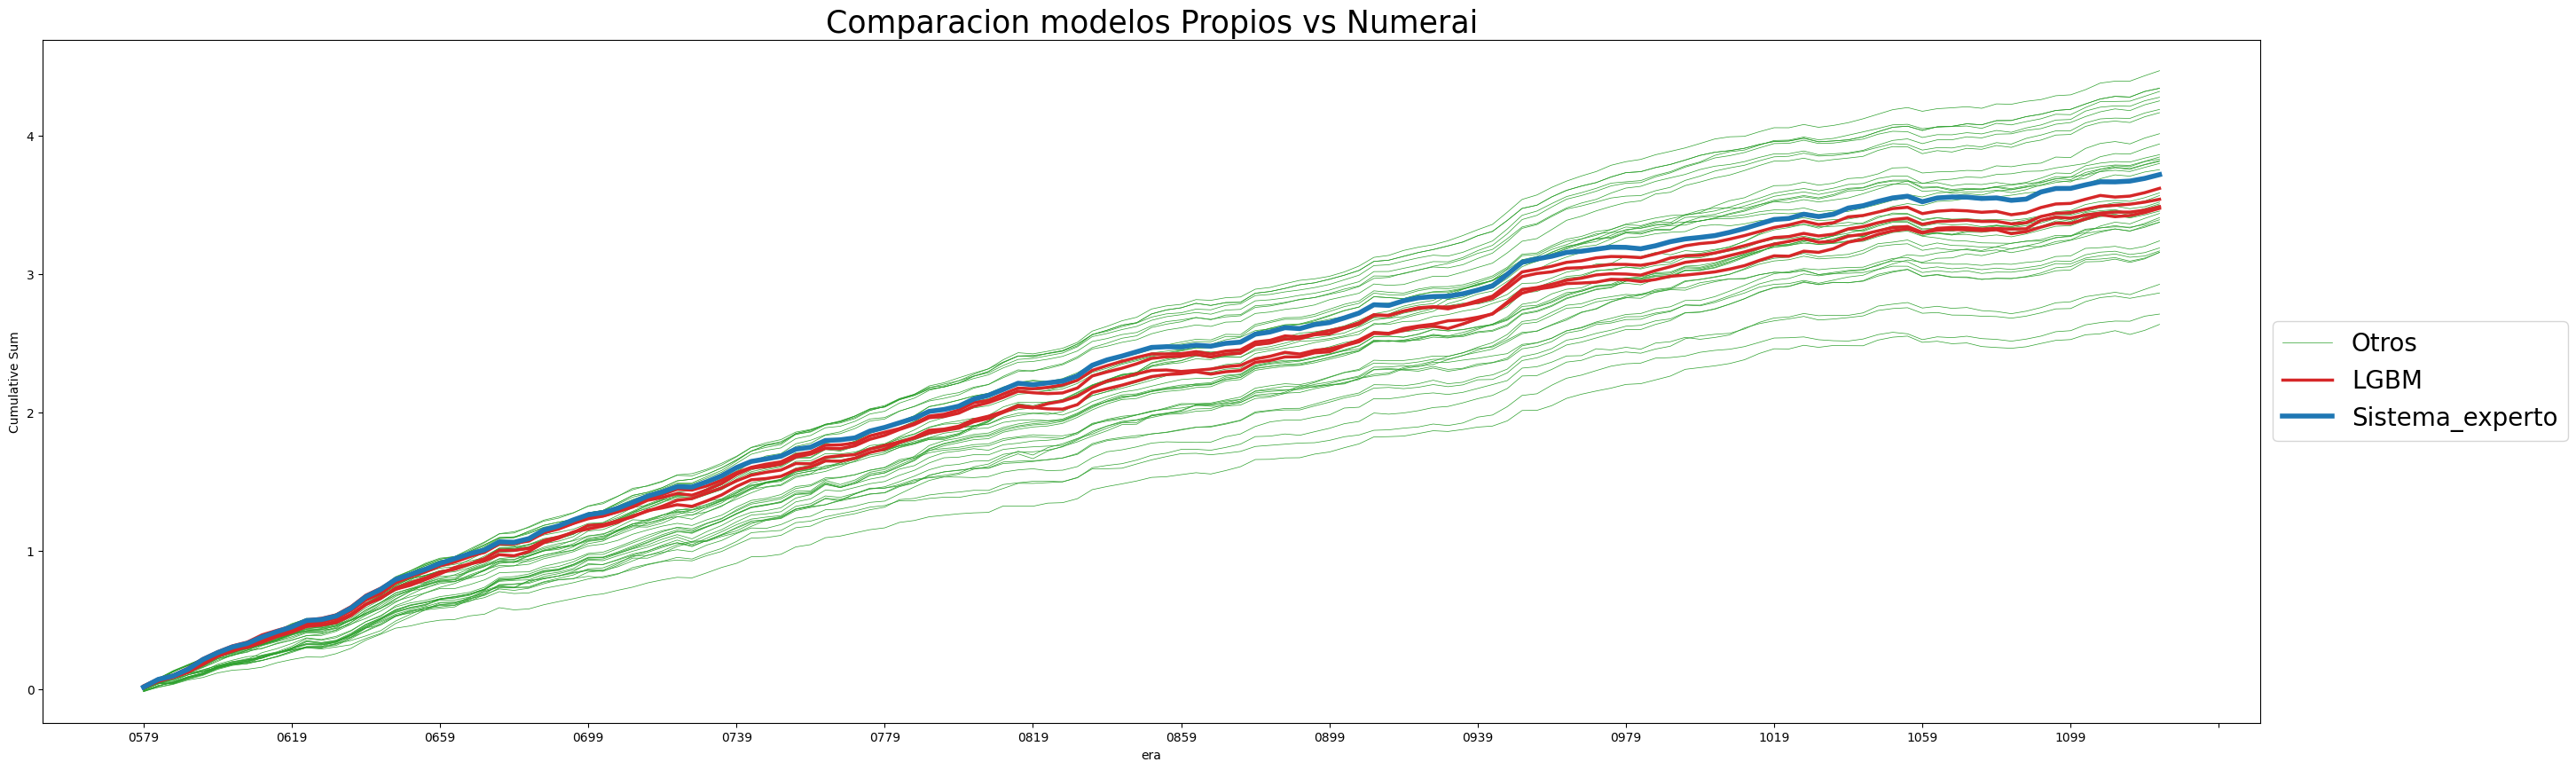

In [59]:
import numpy as np
from matplotlib.ticker import MultipleLocator
import os
color_dict = {
        'Sistema_experto': 'tab:blue',
        'LGBM': 'tab:red',
        'Otros': 'tab:green'
    }

    # Crear una figura más grande para la visualización
plt.figure(figsize=(40, 10))

# Lista para almacenar los handles y labels únicos para la leyenda
handles_labels = {}

for columna in df_eras.columns:
    # Determinar el grupo del modelo
    if 'Sistema_experto' in columna:
        group = 'Sistema_experto'
    elif 'LGBM' in columna:
        group = 'LGBM'
    else:
        group = 'Otros'
    
    color = color_dict[group]

    # Determinar el grosor de la línea
    if group in ['LGBM']:
        linewidth = 2.5  # Ajusta el grosor a tu preferencia

    elif group in ['Sistema_experto']:
        linewidth = 4

    else:
        linewidth = 0.5 # Grosor más delgado para 'Otros'
    
    # Graficar la línea con el color especificado y el grosor determinado
    line, = plt.plot(df_eras[columna].cumsum(), label=columna, color=color, linewidth=linewidth)
    
    # Solo añadir un handle y label por grupo a la leyenda
    if group not in handles_labels:
        handles_labels[group] = line

# Crear la leyenda solo con los nombres de los grupos
plt.legend(handles_labels.values(), handles_labels.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

# Añadir título y etiquetas de los ejes
plt.title("Comparacion modelos Propios vs Numerai", fontsize=25)
plt.xlabel("era")
plt.gca().xaxis.set_major_locator(MultipleLocator(10))

plt.ylabel("Cumulative Sum")

# Ajustar el layout
plt.subplots_adjust(right=0.75)

# Guardar el gráfico como una imagen
plt.savefig(os.path.join("resultados_modelos", f"Comparacion_modelos_propios_vs_numerai.png"))
plt.show()

Mean Absolute Error (MAE): 0.1627533882856369
Mean Squared Error (MSE): 0.050880711525678635


<Figure size 800x400 with 0 Axes>

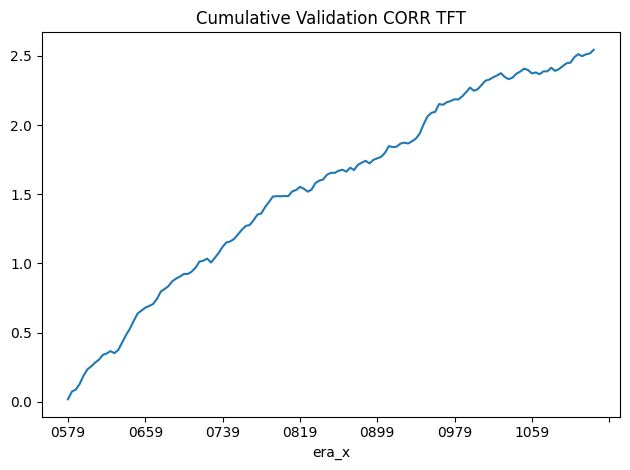

In [13]:
from numerai_tools.scoring import numerai_corr, correlation_contribution
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

y_test = pred_modelos["Target"]
y_pred = pred_modelos["TFT"]


nombre_modelo= "TFT"


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


per_era_corr = pred_modelos.groupby("era_x").apply(
    lambda x: numerai_corr(x[["TFT"]].dropna(), x["Target"].dropna())
)

# Compute the per-era mmc between our predictions, the meta model, and the target values
# per_era_mmc = pred_modelos.dropna().groupby("era_x").apply(
#     lambda x: correlation_contribution(x[["Sistema_experto"]], x["numerai_meta_model"], x["Target"])
# )
# mean_corr_numerai = per_era_corr.mean()

# mean_mmc_numerai = per_era_mmc.mean()

# print(f'Mean Corr Numerai: {mean_corr_numerai}')
# print(f'Mean MMC Numerai: {mean_mmc_numerai}')


plt.figure(figsize=(8, 4))
per_era_corr.cumsum().plot(
    title=f"Cumulative Validation CORR {nombre_modelo}",
    kind="line",
    legend=False
)
plt.tight_layout()
plt.savefig(os.path.join("resultados_modelos", f"Cumulative_Validation_CORR_{nombre_modelo}.png"))


# Plot the per-era correlation
# plt.figure(figsize=(8, 4))
# per_era_corr.plot(
#     title=f"Validation CORR {nombre_modelo}",
#     kind="bar",
#     xticks=[],
#     legend=False
# )
# plt.tight_layout()
# #plt.savefig(os.path.join(output_folder, f"Validation_CORR_{nombre_modelo}.png"))

# # Plot the per-era MMC
# plt.figure(figsize=(8, 4))
# per_era_mmc.plot(
#     title=f"Validation MMC {nombre_modelo}",
#     kind="bar",
#     xticks=[],
#     legend=False
# )
# plt.tight_layout()
# #plt.savefig(os.path.join(output_folder, f"Validation_MMC_{nombre_modelo}.png"))

# # Plot the cumulative validation CORR
# plt.figure(figsize=(8, 4))
# per_era_corr.cumsum().plot(
#     title=f"Cumulative Validation CORR {nombre_modelo}",
#     kind="line",
#     legend=False
# )
# plt.tight_layout()
# #plt.savefig(os.path.join(output_folder, f"Cumulative_Validation_CORR_{nombre_modelo}.png"))

# # Plot the cumulative validation MMC
# plt.figure(figsize=(8, 4))
# per_era_mmc.cumsum().plot(
#     title=f"Cumulative Validation MMC {nombre_modelo}",
#     kind="line",
#     legend=False
# )
# plt.tight_layout()
# #plt.savefig(os.path.join(output_folder, f"Cumulative_Validation_MMC_{nombre_modelo}.png"))

# # Mostrar los gráficos
plt.show()

In [82]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.
